#  <center> Data Science 100 Group Project Proposal <center>
## <center> Predicting Degree of Heart Disease Presence <center>

### PROJECT PROPOSAL

Saige Hickey 86052669 \
Amanda Lindsey 26499640 \
Kylee Dyck 78242021 \
Chengwei Zhu 17055666 


#### Introduction:
For our group project, we chose to use the Heart Disease data, specifically the processed Cleveland dataset (processed.cleveland.data). The term ‘heart disease’ encompasses various different conditions an individual can experience. The data table is populated with some of these variables related to or contributing to heart disease, including age, number of cigarettes per day, resting blood pressure, and cholesterol level. The processed data used for this analysis is from patients in Cleveland who experienced varying types and degrees of chest pain or angina. The question we are hoping to answer is whether we can confidently predict whether an individual has a heart disease based on four numerical predictors found in this dataset. Ultimately, using the variables cholesterol, age, resting blood pressure, and maximum heart rate achieved, we will create a predictor for the presence/absence of heart disease.

#### Methods:
We will be using the variables age, resting blood pressure (trestbps), maximum heart rate achieved (thalach) and cholesterol levels (chol) to conduct our analysis. Initially, the data will be filtered to remove all other columns that do not contribute to the predictory question. Next, we will randomly split our data into training and testing data. We will then use knn classification to predict the presence or absence of heart disease in patients in the testing data. We will test several values for k using the training data. Finally, we will assess the performance of the classification using cross-validation on the training data to determine the optimal value of k for our data. Using a scatter plot, we will visualize the relationships in the data and use aesthetics such as color and shape to differentiate variables. One example of a visualization we use to communicate the results is side-by-side scatter plots of the testing data showing two of the predictive variables, such as cholesterol and age, coloured by presence/absence of heart disease. The two plots will have the same axis, except one plot will have the actual presence/absence of heart disease data, while the other will have the predicted presence/absence data from the model. This way, the viewer can see how closely the plots match and have a visual representation of the predictor’s performance. 

#### Expected outcomes and significance:
We expect higher levels of cholesterol, resting blood pressure, maximum heart rate achieved, and age will correspond to a stronger presence of heart disease. Our findings could impact the awareness of the risks of heart disease based on these four criteria. If people have greater awareness of their innate risk for heart disease, they can take preventive actions to lessen their risk. Studies such as this one can also prompt further analysis to explore and determine what other factors can make a person more susceptible to a heart disease and what measures can people take to avoid heart disease. A potential new question this study might lead to is: do any of these factors interact synergistically? 



In [9]:
## load packages
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

In [10]:
## read data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
## Filter data and select data so there's no N/A observations in the predictor variables
heart_disease_data <- filter(heart_disease_data, age != "?", chol != "?", trestbps != "?",  thalach != "?", num != "?") |>
    select(age, chol, trestbps, thalach, num) |>
    mutate(degree_presence = case_when(num == 0 ~ "absence",
                                num == 1 ~ "small presence",
                                num == 2 ~ "presence",
                                num == 3 ~ "strong presence",
                                num == 4 ~ "strongest presence")) |>
    mutate(degree_presence = as.factor(degree_presence))

## specify levels of factor column
disease_factored <- factor(c("absence", "small presence", "presence", "strong presence", "strongest presence"))
levels(heart_disease_data$degree_presence) <- disease_factored

heart_disease_data

age,chol,trestbps,thalach,num,degree_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,150,0,absence
67,286,160,108,2,small presence
67,229,120,129,1,presence
37,250,130,187,0,absence
41,204,130,172,0,absence
56,236,120,178,0,absence
62,268,140,160,3,strong presence
57,354,120,163,0,absence
63,254,130,147,2,small presence


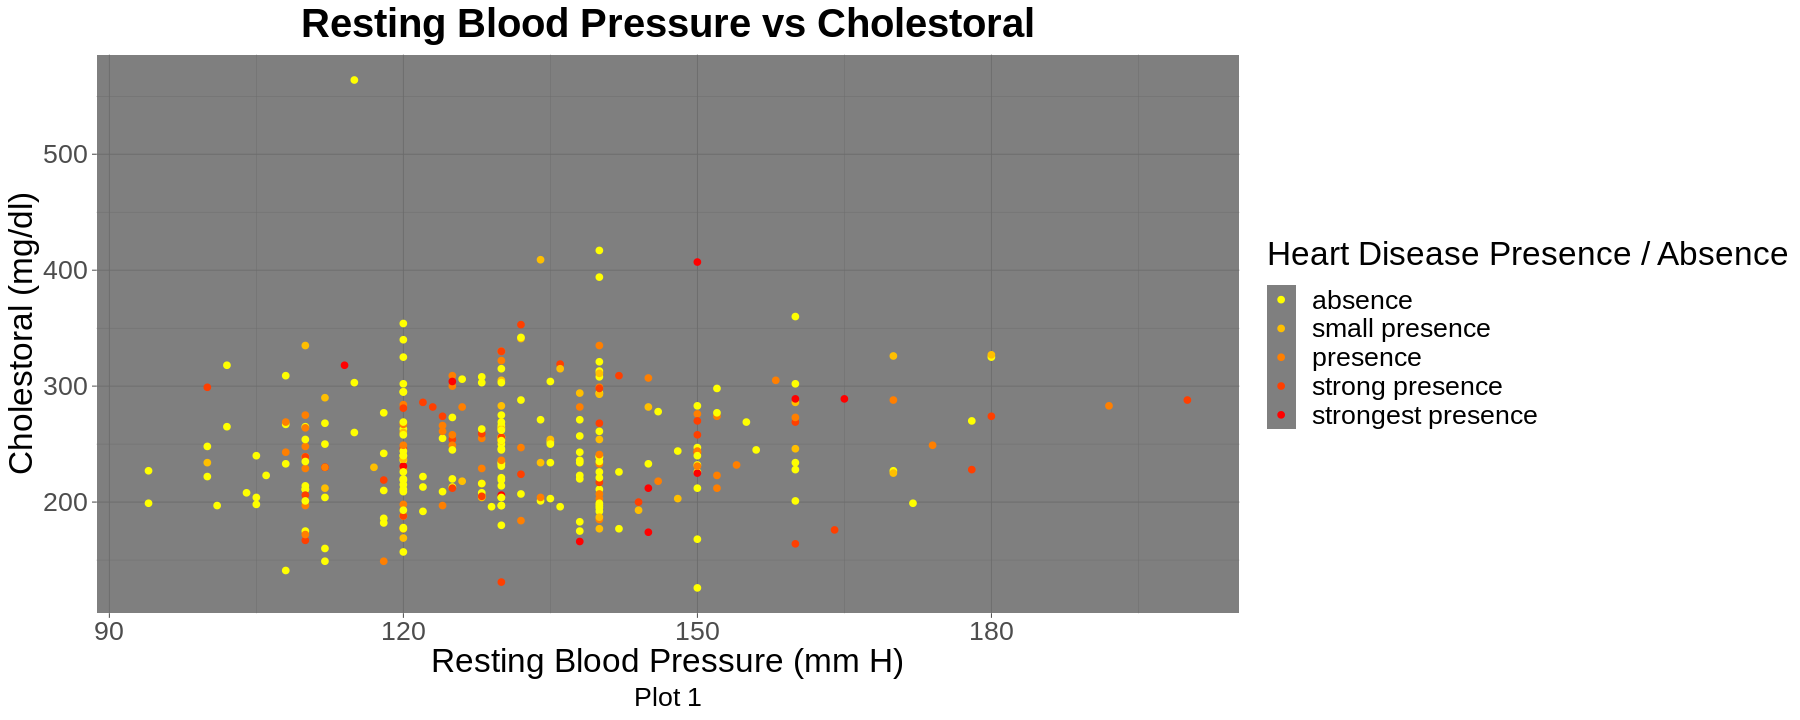

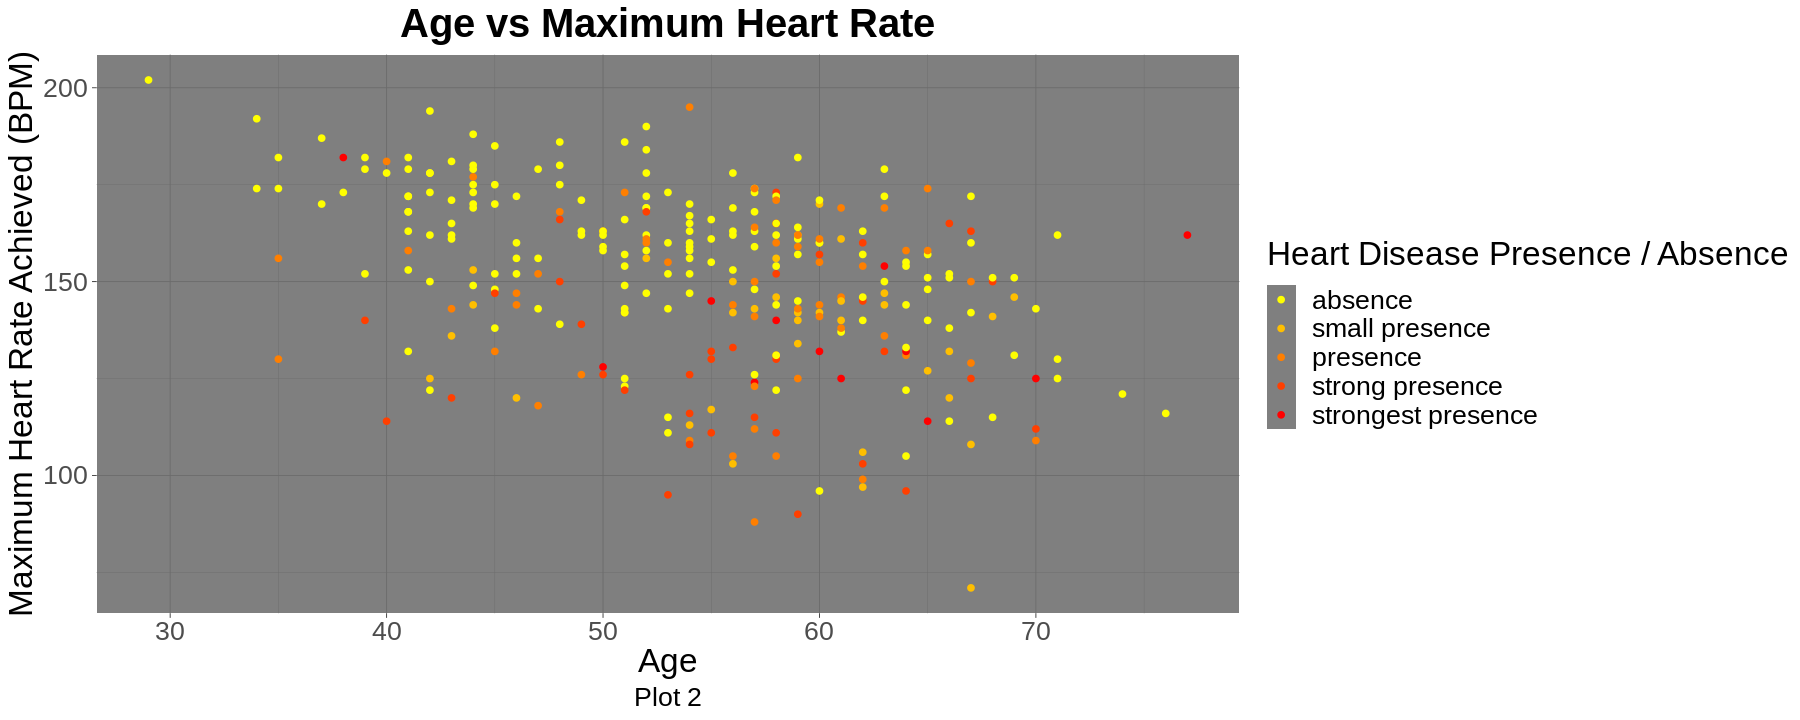

In [12]:
## Exploring the data: plots to visualize and compare our 4 predictors
options(repr.plot.width=15, repr.plot.height=6)

## set colours
colfunc <- colorRampPalette(c("yellow", "red"))
cols <- colfunc(5)

colours <- c("absence" = cols[1], "small presence" = cols[2], "presence" = cols[3], "strong presence" = cols[4], "strongest presence" = cols[5])

## create plot with colour palette
heart_disease_data |>  
    ggplot(aes(x=trestbps, 
               y= chol, 
               colour = degree_presence)) +
    scale_color_manual(values = colours) +
        labs(x = "Resting Blood Pressure (mm H)",
             y = "Cholestoral (mg/dl)",
             title = "Resting Blood Pressure vs Cholestoral", 
            colour = 'Heart Disease Presence / Absence',
            caption = "Plot 1") +
        geom_point() +
        theme_dark() +
        theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption

heart_disease_data |>  
    ggplot(aes(x=age, 
               y=thalach, 
               colour = degree_presence)) +
    scale_color_manual(values = colours) +
        labs(x = "Age",
             y = "Maximum Heart Rate Achieved (BPM)",
             title = "Age vs Maximum Heart Rate", 
            colour = 'Heart Disease Presence / Absence',
            caption = "Plot 2") +
        geom_point() +
        theme_dark() +
        theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption



The first plot above display a slightly positive trend between cholestoral and resting blood pressure. This relationship was expected since higher cholestoral tends to correspond with higher blood pressure (since artieries are narrowed from the accumulation of cholestoral). The second plot shows a slight negative relationship between maximum heart rate and age. This relationship might be explained by the fact that older hearts simply can't beat as fast as younger hearts. We predict that increases in all 4 of these variables will be associated with higher degrees of heart disease presence.  

In [54]:
## Establish training and testing data sets
set.seed(5)
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = degree_presence)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)

age,chol,trestbps,thalach,num,degree_presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,250,130,187,0,absence
41,204,130,172,0,absence
56,236,120,178,0,absence
57,354,120,163,0,absence
57,192,140,148,0,absence
56,294,140,153,0,absence
44,263,120,173,0,absence
52,199,172,162,0,absence
54,239,140,160,0,absence


### Preliminary exploratory data analysis

In [14]:
heart_disease_train_summary <- heart_disease_train |>
    group_by(degree_presence) |>
    summarize(degree_presence_count = n())

heart_disease_train_summary

degree_presence,degree_presence_count
<fct>,<int>
absence,123
small presence,26
presence,41
strong presence,26
strongest presence,10


In [15]:
## CHOLESTEROL
train_chol <- heart_disease_train |>
    select(chol, degree_presence) 

In [16]:
## Absence
absence_chol <- train_chol |>
    filter(degree_presence == "absence") 

total_number_absence_chol <- nrow(absence_chol)

absence_high_chol <- absence_chol |>
    filter(chol >= 240)

number_absence_high_chol <- nrow(absence_high_chol)

percent_high_chol_absent = (number_absence_high_chol/total_number_absence_chol)*100

In [17]:
## Presence
presence_chol <- train_chol |>
    filter(degree_presence != "absence") 

total_number_presence_chol <- nrow(presence_chol)

presence_high_chol <- presence_chol |>
    filter(chol >= 240)

number_presence_high_chol <- nrow(presence_high_chol)

percent_high_chol_present = (number_presence_high_chol/total_number_presence_chol)*100

heart_disease,percent
<chr>,<dbl>
Absent,47.96748
Present,55.33981


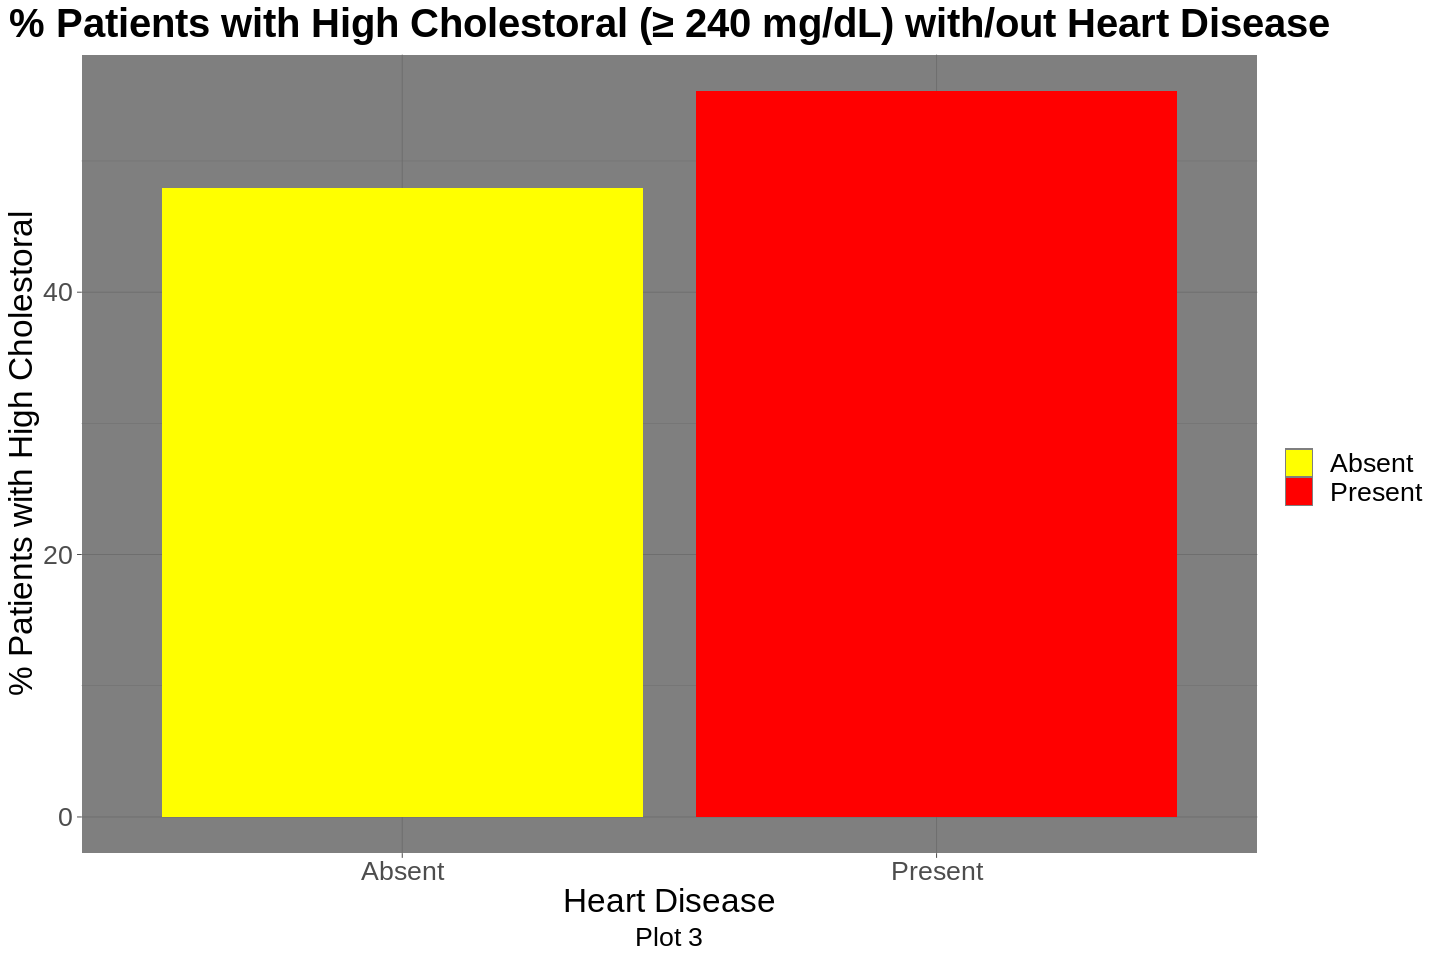

In [18]:
options(repr.plot.width=12, repr.plot.height=8)

percent_high_chol <- tibble(heart_disease = c("Absent", "Present"), percent = c(percent_high_chol_absent, percent_high_chol_present))
percent_high_chol

ggplot(percent_high_chol, aes(x=heart_disease, y=percent, fill=heart_disease)) +
  geom_bar(stat="identity") +
  theme_dark() +
  labs(x = "Heart Disease",
       y = "% Patients with High Cholestoral",
      title = "% Patients with High Cholestoral (≥ 240 mg/dL) with/out Heart Disease",
      caption = "Plot 3") +
      scale_fill_manual("", values = c("Absent" = "yellow", "Present" = "red")) +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


In [19]:
## AGE
train_age <- heart_disease_train |>
    select(age, degree_presence) 

In [20]:
## Absence
absence_age <- train_age |>
    filter(degree_presence == "absence") 

total_number_absence_age <- nrow(absence_age)

absence_high_age <- absence_age |>
    filter(age >= 50)

number_absence_high_age <- nrow(absence_high_age)

percent_high_age_absent = (number_absence_high_age/total_number_absence_age)*100

In [21]:
## Presence
presence_age <- train_age |>
    filter(degree_presence != "absence") 

total_number_presence_age <- nrow(presence_age)

presence_high_age <- presence_age |>
    filter(age >= 50)

number_presence_high_age <- nrow(presence_high_age)

percent_high_age_present = (number_presence_high_age/total_number_presence_age)*100

heart_disease,percent
<chr>,<dbl>
Absent,65.85366
Present,79.61165


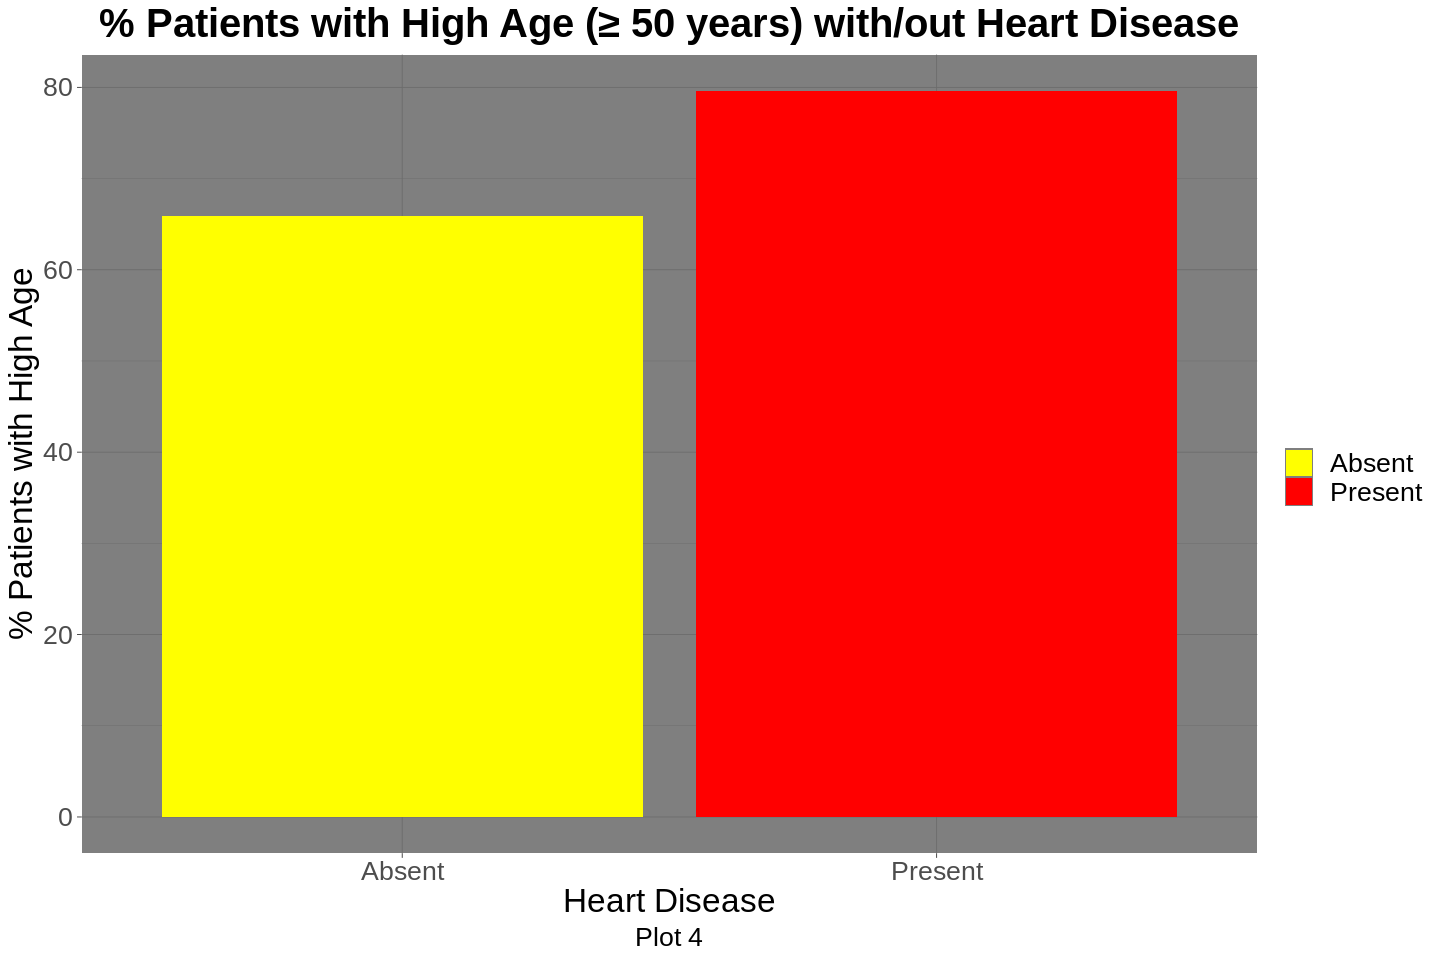

In [22]:
options(repr.plot.width=12, repr.plot.height=8)

percent_high_age <- tibble(heart_disease = c("Absent", "Present"), percent = c(percent_high_age_absent, percent_high_age_present))
percent_high_age

ggplot(percent_high_age, aes(x=heart_disease, y=percent, fill=heart_disease)) +
  geom_bar(stat="identity") +
  theme_dark() +
  labs(x = "Heart Disease",
       y = "% Patients with High Age",
      title = "% Patients with High Age (≥ 50 years) with/out Heart Disease",
      caption = "Plot 4") +
      scale_fill_manual("", values = c("Absent" = "yellow", "Present" = "red")) +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


In [23]:
## RESTING BLOOD PRESSURE
train_bp <- heart_disease_train |>
    select(trestbps, degree_presence) 

In [24]:
## Absence
absence_bp <- train_bp |>
    filter(degree_presence == "absence") 

total_number_absence_bp <- nrow(absence_bp)

absence_high_bp <- absence_bp |>
    filter(trestbps >= 125)

number_absence_high_bp <- nrow(absence_high_bp)

percent_high_bp_absent = (number_absence_high_bp/total_number_absence_bp)*100

In [25]:
## Presence
presence_bp <- train_bp |>
    filter(degree_presence != "absence") 

total_number_presence_bp <- nrow(presence_bp)

presence_high_bp <- presence_bp |>
    filter(trestbps >= 125)

number_presence_high_bp <- nrow(presence_high_bp)

percent_high_bp_present = (number_presence_high_bp/total_number_presence_bp)*100

heart_disease,percent
<chr>,<dbl>
Absent,57.72358
Present,66.99029


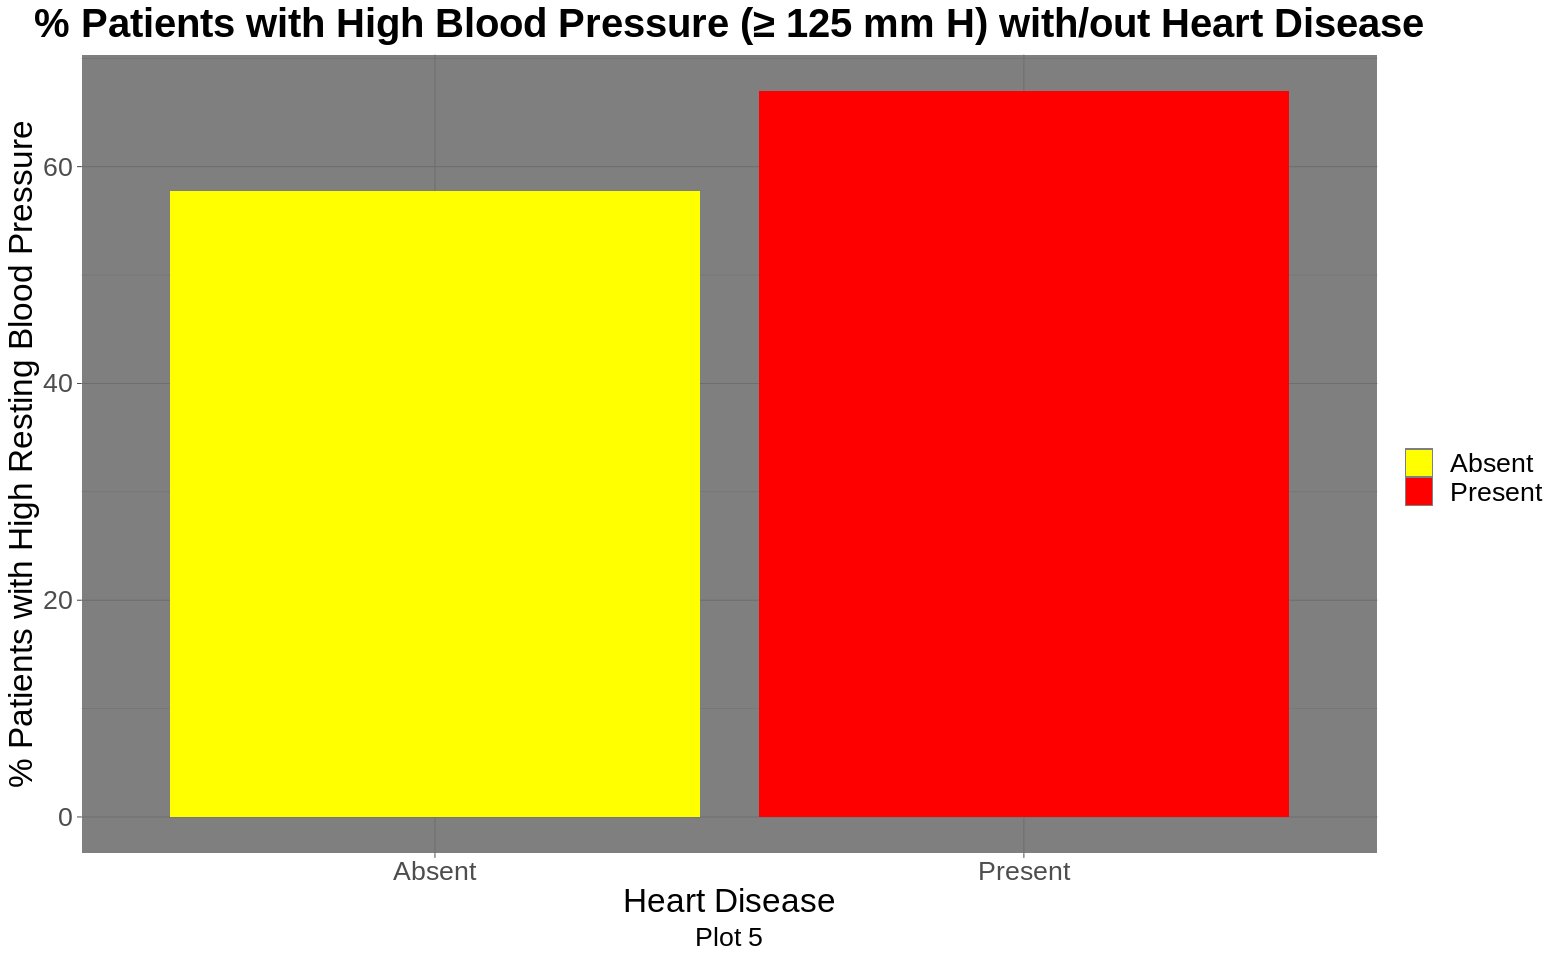

In [26]:
options(repr.plot.width=13, repr.plot.height=8)

percent_high_bp <- tibble(heart_disease = c("Absent", "Present"), percent = c(percent_high_bp_absent, percent_high_bp_present))
percent_high_bp

ggplot(percent_high_bp, aes(x=heart_disease, y=percent, fill=heart_disease)) +
  geom_bar(stat="identity") +
  theme_dark() +
  labs(x = "Heart Disease",
       y = "% Patients with High Resting Blood Pressure",
      title = "% Patients with High Blood Pressure (≥ 125 mm H) with/out Heart Disease",
      caption = "Plot 5") +
      scale_fill_manual("", values = c("Absent" = "yellow", "Present" = "red")) +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


In [27]:
## MAXIMUM HEART RATE ACHIEVED (thalach)
train_hr <- heart_disease_train |>
    filter(age >= 40) |>
    select(thalach, degree_presence) 

In [28]:
## Absence
absence_hr <- train_hr |>
    filter(degree_presence == "absence") 

total_number_absence_hr <- nrow(absence_hr)

absence_high_hr <- absence_hr |>
    filter(thalach >= 180)

number_absence_high_hr <- nrow(absence_high_hr)

percent_high_hr_absent = (number_absence_high_hr/total_number_absence_hr)*100

In [29]:
## Presence
presence_hr <- train_hr |>
    filter(degree_presence != "absence") 

total_number_presence_hr <- nrow(presence_hr)

presence_high_hr <- presence_hr |>
    filter(thalach >= 180)

number_presence_high_hr <- nrow(presence_high_hr)

percent_high_hr_present = (number_presence_high_hr/total_number_presence_hr)*100

heart_disease,percent
<chr>,<dbl>
Absent,6.896552
Present,1.000000


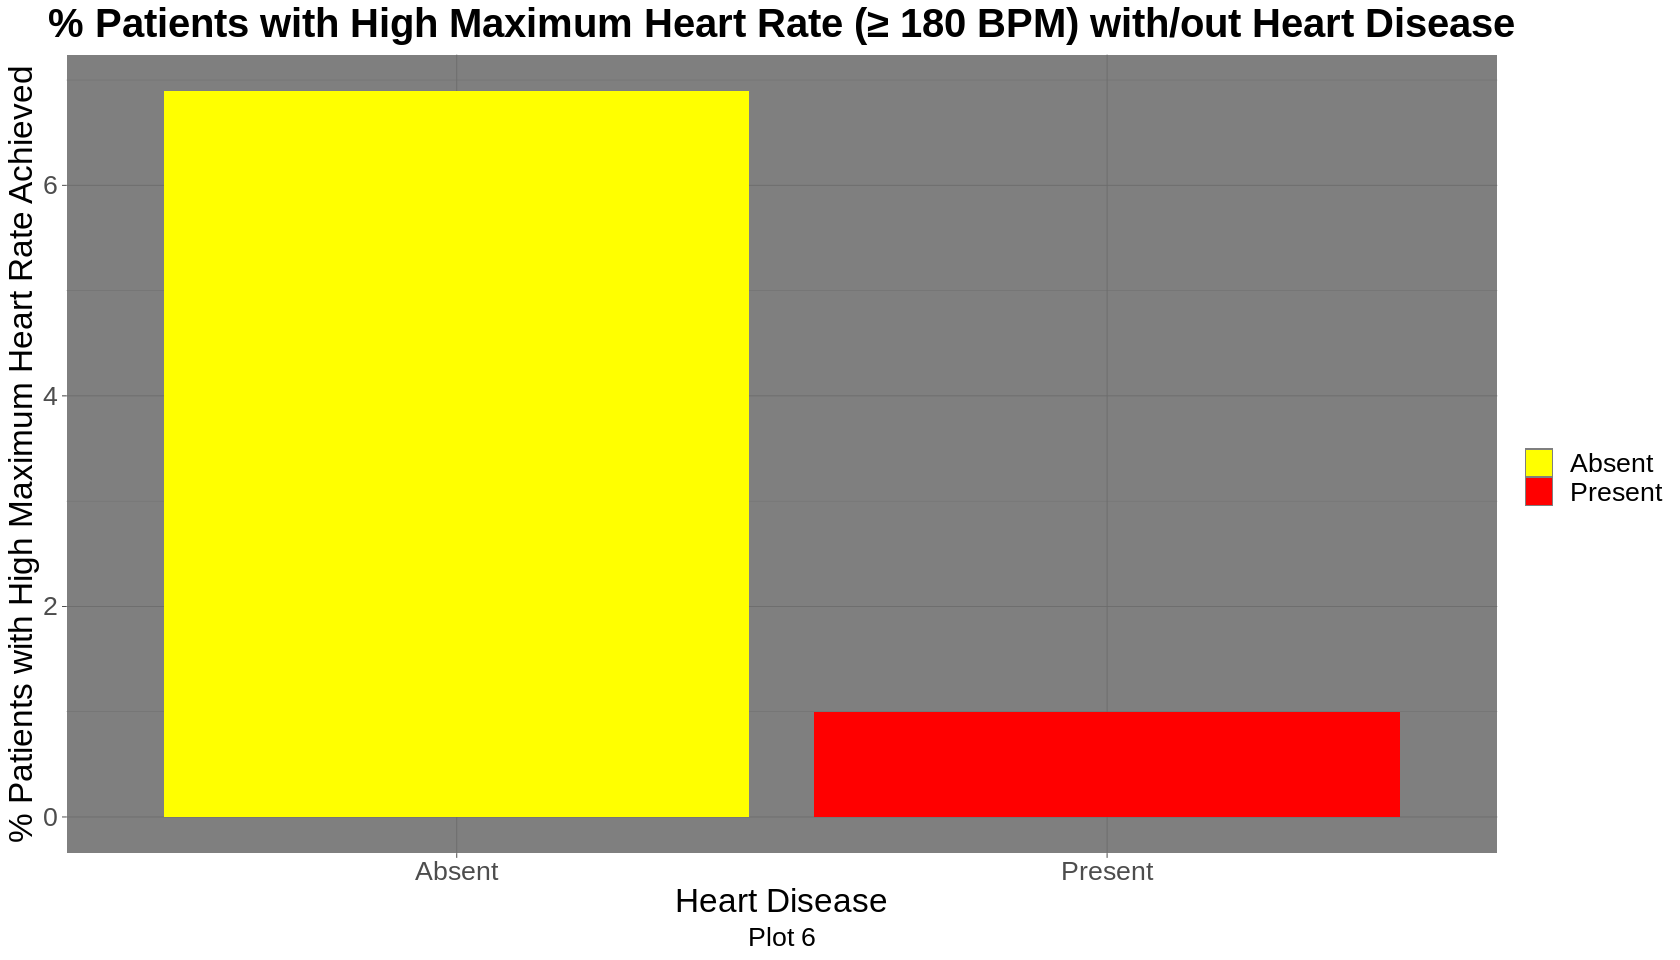

In [30]:
options(repr.plot.width=14, repr.plot.height=8)

percent_high_hr <- tibble(heart_disease = c("Absent", "Present"), percent = c(percent_high_hr_absent, percent_high_hr_present))
percent_high_hr

ggplot(percent_high_hr, aes(x=heart_disease, y=percent, fill=heart_disease)) +
  geom_bar(stat="identity") +
  theme_dark() +
  labs(x = "Heart Disease",
       y = "% Patients with High Maximum Heart Rate Achieved",
      title = "% Patients with High Maximum Heart Rate (≥ 180 BPM) with/out Heart Disease",
      caption = "Plot 6") +
      scale_fill_manual("", values = c("Absent" = "yellow", "Present" = "red")) +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5)) ## centers title and caption


Our preliminary data analysis supports our initial hypothesis that higher levels of our 3 of the predictive variables is more prominant in patients with some degree of heart disease (cholestoral, age, and resting blood pressure). However, the execption is maximum heart rate achieved which was higher in patients without heart disease. We considered patients over the age of 40 in our calculation of "high" maximum heart rate (using the generallly accepted approximation that maximum beats per minute can be found by subtracting age from 220, so 220-40 = 180 thus anything over 180 is high for people over 40). 

Given our premlinimary data analysis, we accordingly adjust our hypothesis such that we now predict lower maximim heart rate will correspond to higher degrees of heart disease presence in patients. However, Plots 3, 4, and 5 support our initial hypothesis that high levels of cholestoral, age, and blood pressure correspond to higher levels of heart disease compared to lower levels of those 3 predictors

*Disclaimer*: The threshholds chosen for "high" levels of our 4 predictors is somewhat arbitrary, but not inaccurate given research conducted.

## Data Analysis

In [102]:
## Filter data and select data so there's no N/A observations in the predictor variables
heart_disease_data <- filter(heart_disease_data, age != "?", chol != "?", trestbps != "?",  thalach != "?", num != "?") |>
    select(age, chol, trestbps, thalach, num) |>
    mutate(degree_presence = case_when(num == 0 ~ "absence",
                                num == 1 ~ "presence",
                                num == 2 ~ "presence",
                                num == 3 ~ "presence",
                                num == 4 ~ "presence")) |>
    mutate(degree_presence = as.factor(degree_presence))

## specify levels of factor column
disease_factored <- factor(c("absence", " presence"))
levels(heart_disease_data$degree_presence) <- disease_factored

In [103]:
## Establish training and testing data sets
set.seed(5)
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = degree_presence)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)

### Calibrating Parameter K

In [126]:
## Create model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

## Create recipe, scale and center data
# heart_recipe <- recipe(degree_presence ~ age + chol + trestbps + thalach, data = heart_disease_train) |>
#    step_scale(all_predictors()) |>
#    step_center(all_predictors())

heart_recipe <- recipe(degree_presence ~ age + thalach, data = heart_disease_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

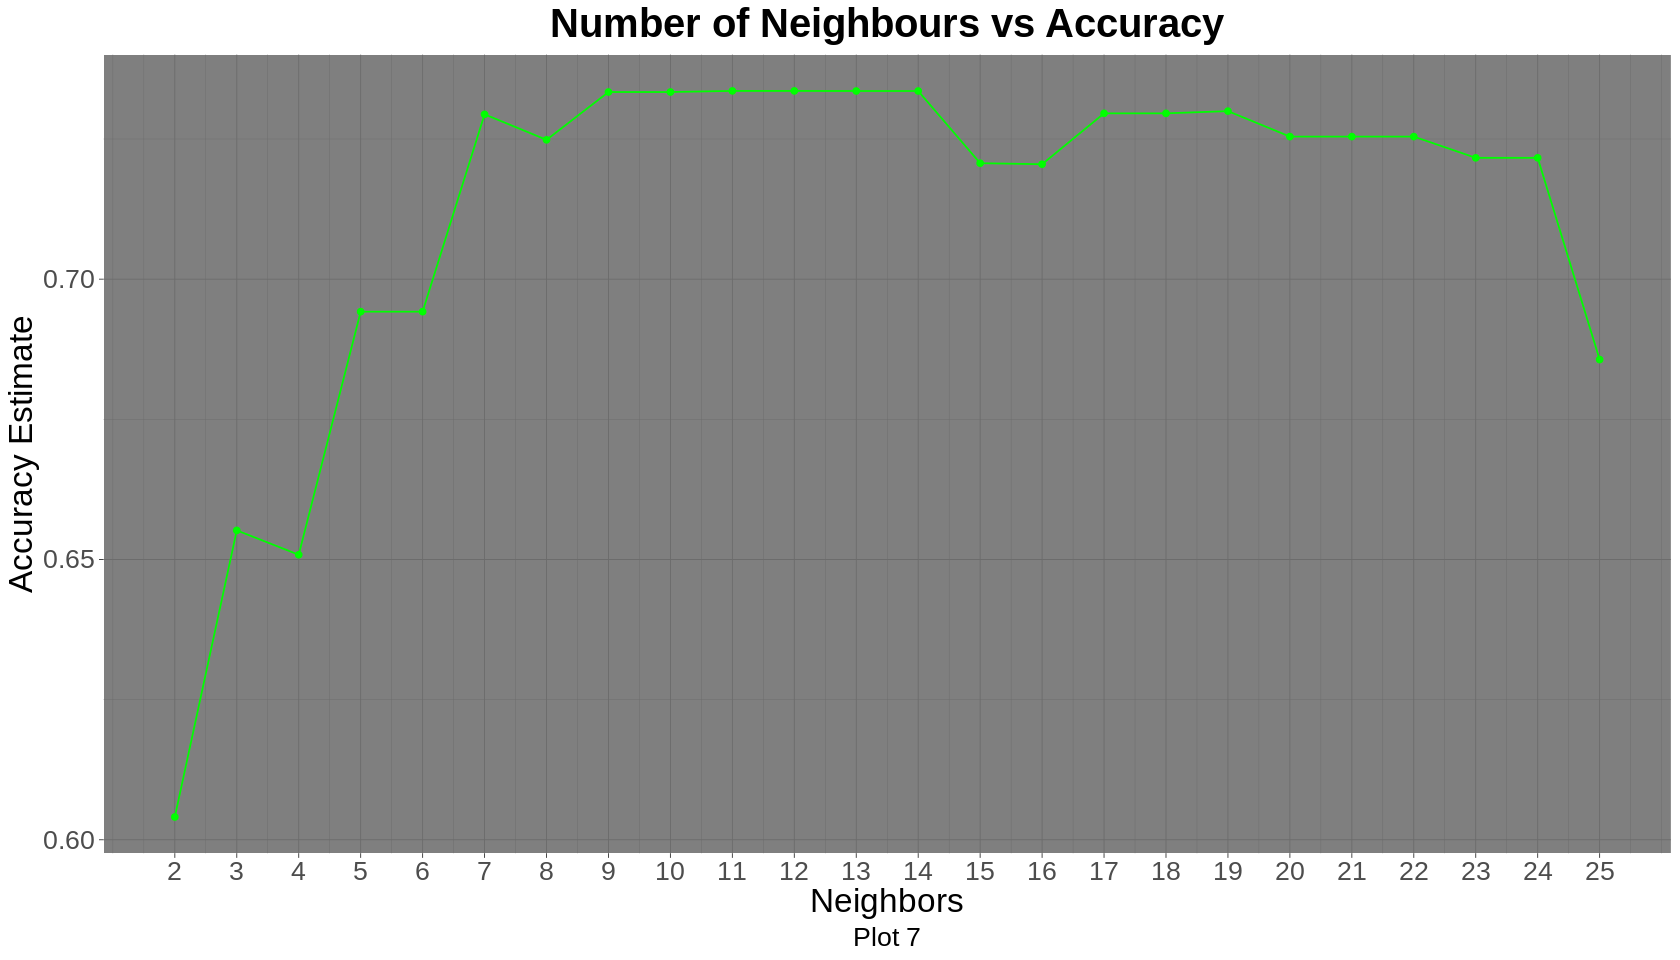

In [127]:
# Cross validation
heart_vfold <- vfold_cv(heart_disease_train, v = 10, strata = degree_presence)

## k values to try
k_vals <- tibble(neighbors = seq(from = 2, to = 25, by = 1))

## Create a workflow & get accuracy metrics
heart_accuracies <- workflow() |>
      add_recipe(heart_recipe) |>
      add_model(knn_spec) |>
      tune_grid(resamples = heart_vfold, grid = k_vals) |>
      collect_metrics() |>
      filter(.metric == "accuracy")

## Plot the 𝑘 vs the accuracy
cross_val_plot <- ggplot(heart_accuracies, aes(x = neighbors, y = mean))+
  geom_point(color = "green") +
  geom_line(color = "green") +
  labs(x = "Neighbors", 
       y = "Accuracy Estimate", 
       title = "Number of Neighbours vs Accuracy", 
       caption = "Plot 7") +
  scale_x_continuous(breaks = round(seq(min(heart_accuracies$neighbors), max(heart_accuracies$neighbors), by = 1),1)) +
  theme_dark() +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

cross_val_plot

In [128]:
## Select highest accuracy k
k <- heart_accuracies |>
    arrange(-mean) |>
    slice(1) |>
    pull(neighbors)

k 

[1] 11

### Conducting Classification with Highest Accuracy K

In [ ]:
## New model specification
knn_refined_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k) |>
      set_engine("kknn") |>
      set_mode("classification")

## New workflow 
heart_accuracies <- workflow() |>
      add_recipe(heart_recipe) |>
      add_model(knn_spec) |>
      fit(data = training_set)